# Classification

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### style

In [2]:
plt.style.use('ggplot')

## Read data and drop not inmportant id

In [3]:
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')
iris.drop('id', axis=1, inplace=True)
iris['species'].value_counts()

iris-setosa        50
iris-versicolor    50
iris-virginica     50
Name: species, dtype: int64

### plot histograms

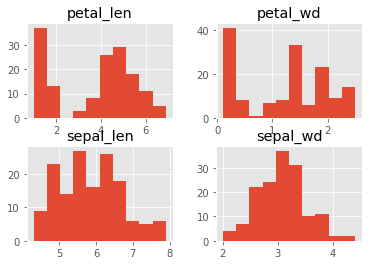

In [4]:
iris.hist()
plt.show()

## Sepal scatter graph

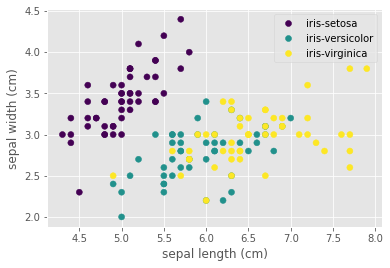

In [5]:
inv_name_dict = {'iris-setosa': 0, 'iris-versicolor': 1, 'iris-virginica': 2}

colors = [inv_name_dict[item] for item in iris['species']]
scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(handles=scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

### Petal scatter graph

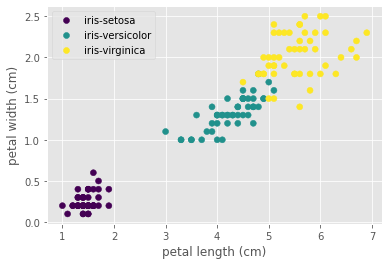

In [6]:
scatter = plt.scatter(iris['petal_len'], iris['petal_wd'], c=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(handles=scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

## Data preparation

In [7]:
X = iris[['petal_len', 'petal_wd']]
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

iris-setosa        35
iris-versicolor    35
iris-virginica     35
Name: species, dtype: int64
iris-setosa        15
iris-virginica     15
iris-versicolor    15
Name: species, dtype: int64


## Modeling

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Prediction

In [9]:
y_pred = knn.predict(X_test)
print(y_pred[:5])
print(y_test.head())

['iris-virginica' 'iris-setosa' 'iris-setosa' 'iris-versicolor'
 'iris-versicolor']
148     iris-virginica
5          iris-setosa
6          iris-setosa
106     iris-virginica
75     iris-versicolor
Name: species, dtype: object


## Probability prediction

In [10]:
y_pred_prob = knn.predict_proba(X_test)
print(y_pred_prob[10:12])
print(y_pred[10:12])

[[1.  0.  0. ]
 [0.  0.2 0.8]]
['iris-setosa' 'iris-virginica']


## Accuracy

In [11]:
print((y_pred==y_test.values).sum())
print(y_test.size)
print()
print((y_pred==y_test.values).sum()/y_test.size)
print(knn.score(X_test, y_test))

44
45

0.9777777777777777
0.9777777777777777


### Confusing matrix

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=['iris-setosa','iris-versicolor','iris-virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

### Graphic confusing matrix

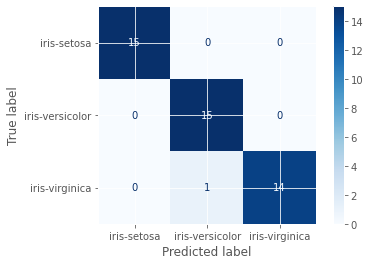

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

### K-fold cross validation

In [14]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print(cv_scores)
print(cv_scores.mean())

[0.96666667 0.96666667 0.9        0.93333333 1.        ]
0.9533333333333334


## Finding optimal k alias tuning the hyperparameter

In [15]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 10)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X,y)
print(knn_gscv.best_params_)

{'n_neighbors': 4}


# Building the final mode

In [16]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X,y)
y_pred = knn_final.predict(X)
print(knn_final.score(X,y))

0.9733333333333334


### Using

In [17]:
new_data = np.array([3.76, 1.20])
new_data = new_data.reshape(1,-1)
print(knn_final.predict(new_data))
new_data2 = np.array([[3.76, 1.20]])
print()
print(knn_final.predict(new_data2))

['iris-versicolor']

['iris-versicolor']


#### More data

In [18]:
new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])
print(knn_final.predict(new_data))
print(knn_final.predict_proba(new_data))

['iris-versicolor' 'iris-virginica' 'iris-setosa']
[[0.   1.   0.  ]
 [0.   0.25 0.75]
 [1.   0.   0.  ]]
